| pvm         | data        | tekijä   |
| ---------   | -------     | -------- |
| 2019-02-19  | [Kelan etuuksien saajat ja etuusmäärät](https://beta.avoindata.fi/data/fi/dataset/kelan-etuudet-ja-saajat) | Markus Kainu |
 
# Käyttöesimerkkejä: Kelan etuuksien saajat ja etuusmäärät

## Resurssien lataaminen

In [7]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:etuuksien')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [3]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [34]:
print(meta['description'])

sisältää tiedot Kelan maksamien etuuksien saajista, maksetuista etuuksista ja keskimääräisistä etuuksista (euroa/saaja). Raportti kattaa valtaosan Kelan maksamista etuuksista.
Maksetuista etuuksista kuitenkin puuttuvat työnantajien järjestämästä työterveyshuollosta, yrittäjien työterveyshuollosta ja opiskelijoiden terveydenhuollosta maksetut korvaukset.
Eläkkeistä, vammaisetuuksista, asumistuista ja elatustuesta ei tilastoida vuoden aikana etuutta saaneita henkilöitä eikä keskimääräisiä etuuksia. Näistä etuuksista tilastoidaan ainoastaan poikkileikkaushetken tiedot kuukausittain.
Yleisen asumistuen tilastoinnissa saajien tilastoyksikkö on asumistuen ruokakunta, ja keskimääräinen etuus tilastoidaan asumistuen ruokakuntaa kohti.
Opintolainavähennys on verovähennys, joten maksettua etuutta ei ole.
Perustoimeentulotuen tilastoinnissa saajien tilastoyksikkö on toimeentulotuen kotitalous, ja keskimääräinen etuus tilastoidaan toimeentulotuen kotitaloutta kohti.



**Datan muuttujatieto**

In [4]:
json_normalize(meta['resources'][0]['schema']['fields'])

,description,format,name,title,type
0,Vuoden 2019 kuntajakoa vastaava kuntanumero,default,kuntanumero,Kuntanumero,integer
1,Vuoden 2019 kuntajakoa vastaava kuntanimi suom...,default,kunta,Kuntanimi,string
2,Vuosi,default,vuosi,Vuosi,integer
3,"Etuus, yksi seuravista: Elatustuki, Eläke-etuu...",default,etuus,Etuus,string
4,Etuutta saaneiden määrä,default,saajat,Saajat,integer
5,Etuuden kuntatason summa,default,maksetut_etuudet_euroa,Maksetut etuudet Euroa,number
6,Etuuden saajakohtainen kuntatason keskiarvo,default,euroa_per_saaja,Euroa/saaja,number


**Datan ensimmäiset rivit**

In [57]:
print(dat.head())

   kuntanumero      kunta   vuosi      etuus  saajat maksetut_etuudet_euroa  \
0          5.0   Alajärvi  2007.0  Kuntoutus   210.0              495806,49   
1          9.0  Alavieska  2007.0  Kuntoutus    41.0              143525,14   
2         10.0     Alavus  2007.0  Kuntoutus   240.0              612924,31   
3         16.0   Asikkala  2007.0  Kuntoutus   119.0              299270,66   
4         18.0     Askola  2007.0  Kuntoutus    52.0              175090,15   

  euroa_per_saaja  
0       2360,9833  
1       3500,6132  
2       2553,8513  
3       2514,8795  
4       3367,1183  


In [82]:
plotdat = (dat
 .query('vuosi == 2018')
 .query('etuus == "Äitiysavustus"')
 .sort_values(by='maksetut_etuudet_euroa', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

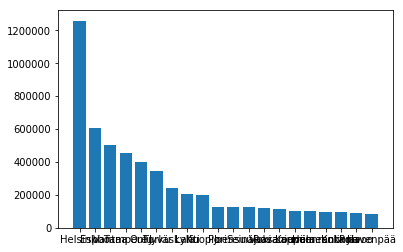

In [83]:
plt.bar(plotdat['kunta'], plotdat['maksetut_etuudet_euroa'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [124]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id      etuus  \
0  '2007':3 '210':5 '2360':8 '49':7 '495806':6 '5...    1  Kuntoutus   
1  '14':7 '143525':6 '2007':3 '3500':8 '41':5 '61...    2  Kuntoutus   
2  '10':1 '2007':3 '240':5 '2553':8 '31':7 '61292...    3  Kuntoutus   
3  '119':5 '16':1 '2007':3 '2514':8 '299270':6 '6...    4  Kuntoutus   
4  '1183':9 '15':7 '175090':6 '18':1 '2007':3 '33...    5  Kuntoutus   

  euroa_per_saaja      kunta kuntanumero maksetut_etuudet_euroa  saajat vuosi  
0       2360,9833   Alajärvi           5              495806,49     210  2007  
1       3500,6132  Alavieska           9              143525,14      41  2007  
2       2553,8513     Alavus          10              612924,31     240  2007  
3       2514,8795   Asikkala          16              299270,66     119  2007  
4       3367,1183     Askola          18              175090,15      52  2007  
